### KNN

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(15,10)

In [52]:
df = pd.read_csv('../data/Iris.csv')
df = df.rename(index=str, columns={"Species": "Class"})

In [53]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

In [55]:
features_ = df.drop(['SepalWidthCm','PetalWidthCm','Class','Id'],axis=1).values
class_ = df['Class'].values

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder_forecast = LabelEncoder()
class_ = labelencoder_forecast.fit_transform(class_)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
classifier_knn = KNeighborsClassifier(n_neighbors=11)
classifier_knn.fit(X_train,y_train)
y_pred = classifier_knn.predict(X_test)

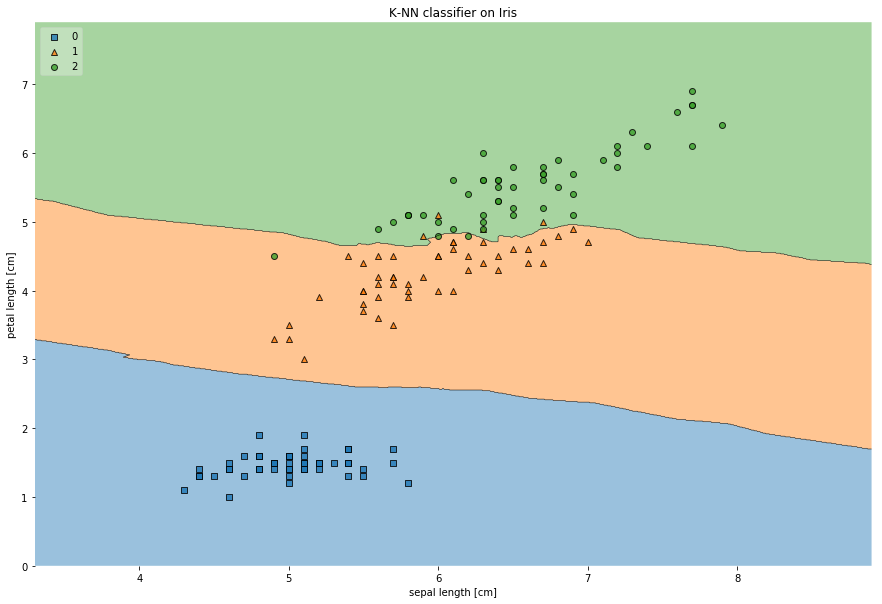

In [71]:
#Decision regions in 2D
from mlxtend.plotting import plot_decision_regions

#Plotting decision regions
plot_decision_regions(features_, class_, clf=classifier_knn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('K-NN classifier on Iris')
plt.show()

#### avaliando o algoritmo com validação cruzada

In [72]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_knn, features_, class_, scoring='accuracy', cv=10)
print(scores_dt.mean())

0.9533333333333334


In [73]:
print(classification_report(y_test,y_pred))
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

KNN model accuracy(in %): 97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


####  Escolhendo um valor K

In [74]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

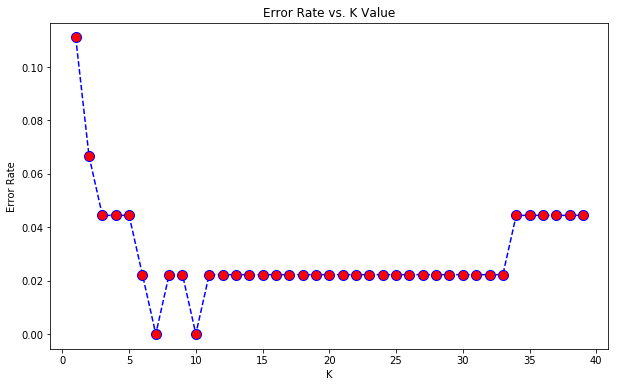

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')